# Hyppo | Business Case - Growth & Automation

## Sección 1: El negocio y el ciclo de vida del cliente

### Librerías utilizadas

- **pandas**: Para manipulación de datos tabulares.
- **numpy**: Para operaciones matemáticas.
- **matplotlib/seaborn**: Para visualización de datos.
- **datetime**: Para manipulación de fechas.

In [2]:
# Librerías generales
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Manejo de fechas
from datetime import datetime

### Carga de datos

En esta sección se importan los datasets proporcionados.

In [3]:
# Cargar datasets desde archivos Excel

# Transacciones del período 2023 y 2024 hasta octubre
df_bd_orders = pd.read_excel('pages/bd_orders.xlsx', engine='openpyxl')

# Base de datos de descargas de la app desde Diciembre 2022 en adelante
df_BD_signups = pd.read_excel('pages/BD_signups.xlsx', engine='openpyxl')

Traceback (most recent call last):
  File "c:\Users\solange.moreyra\.vscode\extensions\ms-python.python-2024.22.0-win32-x64\python_files\python_server.py", line 133, in exec_user_input
    retval = callable_(user_input, user_globals)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 4, in <module>
  File "C:\Users\solange.moreyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\io\excel\_base.py", line 495, in read_excel
    io = ExcelFile(
         ^^^^^^^^^^
  File "C:\Users\solange.moreyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\io\excel\_base.py", line 1567, in __init__
    self._reader = self._engines[engine](
                   ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\solange.moreyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python

In [ ]:
df_bd_orders = pd.read_csv('pages/bd_orders - bq-results-20241024-134337-1729777484801.csv')

In [4]:
# Visualizar las primeras filas de orders
print(df_bd_orders.head())

       order_id  ... items_entregados
0  912710261SE1  ...               34
1  912709920SE1  ...               91
2  912709908SE1  ...               34
3  912709881SE1  ...               36
4  912709621SE1  ...               37

[5 rows x 14 columns]


In [5]:
# Visualizar las primeras filas de signups
print(df_BD_signups.head())

                    customer_id                  fecha_registro  \
0  g5lKDcWZDJzFMzJ2Bl6VaHpJiwM=  2023-04-04 10:14:31.000000 UTC   
1  ucMqsvu35mpXquTuxpfuclwXbo4=  2024-01-09 18:32:02.000000 UTC   
2  ABoOKaQVIsD7p16ZdWmL0EIQZNE=  2023-01-15 15:48:04.000000 UTC   
3  Wo5RRGAF8PBRh0A9jDbVnvzR1jQ=  2024-04-12 17:33:25.000000 UTC   
4  If1cgc2vscM3PevKkFCRlpkx5vQ=  2023-04-03 20:45:32.000000 UTC   

  fecha_registro_formatted  
0               2023-04-04  
1               2024-01-09  
2               2023-01-15  
3               2024-04-12  
4               2023-04-03  


### Análisis exploratorio de datos (EDA)

- **Shape**: Dimensiones de los datasets.
- **Missing values**: Identificación de valores nulos.
- **Distribuciones**: Análisis de distribuciones clave.

In [6]:
# Dimensiones de los datasets
print(f"File bd orders shape: {df_bd_orders.shape}")
print(f"File bd signups shape: {df_BD_signups.shape}")

File bd orders shape: (310153, 14)
File bd signups shape: (18411, 3)


In [ ]:
# Convertir la columna de fechas a datetime
df_bd_orders['order_date_formatted'] = pd.to_datetime(df_bd_orders['order_date_formatted'], errors='coerce')

In [7]:
# Me fijo el tipo de dato de cada uno, tengo que validar el tipo de dato tenga sentido. 
df_bd_orders.dtypes

order_id                        object
order_date                      object
order_date_formatted    datetime64[ns]
customer_id                     object
shipping_value                 float64
total_value                    float64
channel                         object
categoria                       object
tipo_orden                      object
fecha_prometida                 object
skus_pedidos                     int64
skus_entregados                float64
items_pedidos                    int64
items_entregados                 int64
dtype: object


In [8]:
# Me fijo el tipo de dato de cada uno, tengo que validar el tipo de dato tenga sentido. 
df_BD_signups.dtypes

customer_id                         object
fecha_registro                      object
fecha_registro_formatted    datetime64[ns]
dtype: object

In [9]:
# Valores nulos bd orders
print(df_bd_orders.isnull().sum())

order_id                     0
order_date                   0
order_date_formatted         0
customer_id                 19
shipping_value               0
total_value                  0
channel                      0
categoria               223865
tipo_orden                   0
fecha_prometida              0
skus_pedidos                 0
skus_entregados           3569
items_pedidos                0
items_entregados             0
dtype: int64


Conclusión: 
- Por lo que se puede ver hay muchos sku que fueron pedidos pero que no fueron entregados, podría ser la tas ade cncelación? Será que no se lo vincula a ningún sku?
- Algunos no tienen categoría

In [10]:
# Valores nulos bd signups
print(df_BD_signups.isnull().sum())

customer_id                 0
fecha_registro              0
fecha_registro_formatted    0
dtype: int64


In [11]:
# Estadísticas descriptivas bd orders
print(df_bd_orders.describe())

                order_date_formatted  shipping_value    total_value  \
count                         310153   310153.000000  310153.000000   
mean   2023-11-02 14:49:55.324243456        2.576440      35.969412   
min              2023-01-01 00:00:00        0.000000      -2.160000   
25%              2023-05-16 00:00:00        2.350000      12.540000   
50%              2023-10-24 00:00:00        3.290000      22.310000   
75%              2024-04-16 00:00:00        3.290000      42.770000   
max              2024-10-23 00:00:00        7.500000     595.910000   
std                              NaN        1.218902      41.104948   

        skus_pedidos  skus_entregados  items_pedidos  items_entregados  
count  310153.000000    306584.000000  310153.000000     310153.000000  
mean        8.587926         8.288723      13.507337         12.826460  
min         1.000000         0.000000       1.000000          0.000000  
25%         2.000000         2.000000       3.000000          2.0000

In [12]:
# Estadísticas descriptivas bd singups
print(df_BD_signups.describe())

            fecha_registro_formatted
count                          18411
mean   2023-10-29 10:58:33.768942336
min              2022-12-01 00:00:00
25%              2023-04-29 00:00:00
50%              2023-11-17 00:00:00
75%              2024-04-27 00:00:00
max              2024-10-23 00:00:00


In [13]:
# Me fijo en las variables categóricas qué opciones hay y cuáles hay de cada una

# channel
print(df_bd_orders['channel'].value_counts())

channel
Market    221947
Eats       88206
Name: count, dtype: int64


Se puede ver que no hay pedidos sin categoría. 

In [14]:
# Me fijo en las variables categóricas qué opciones hay y cuáles hay de cada una

# categoria
print(df_bd_orders['categoria'].value_counts())

categoria
BBQ & Grill                             22334
Hamburguesas                            21151
Cafetería                               11543
Populares                                5954
Helado y Yogurt                          5942
Ecuatoriana                              3960
Internacional                            2956
Asiática                                 2704
Pizza                                    2546
Top del mes                              2036
Saludable                                1349
Mexicana                                  986
Mariscos                                  845
Postres                                   743
Árabe                                     633
Super Promos por el Día del Canguil!      280
Promociones Exclusivas                    223
Gourmet                                    65
Comida rápida                              32
Hasta 50% OFF en Desayunos                  6
Name: count, dtype: int64


In [15]:
# Me fijo en las variables categóricas qué opciones hay y cuáles hay de cada una

# tipo_orden
print(df_bd_orders['tipo_orden'].value_counts())

tipo_orden
INMEDIATA     297870
PROGRAMADA      9117
SIN APUROS      3166
Name: count, dtype: int64


### Análisis de la performance general del negocio

#### Total de ventas por línea de negocio (Market vs Eats).

In [16]:
# Cantida de ventas por la línea Market
ventas_market = df_bd_orders[df_bd_orders['channel'] == 'Market'].shape[0]

# Mostrar el resultado
print(f"Ventas por la línea Market: {ventas_market}")

Ventas por la línea Market: 221947


In [17]:
# Agrupar por 'channel' y sumar las ventas para 'Eats'
ventas_eats = df_bd_orders[df_bd_orders['channel'] == 'Eats'].shape[0]

# Mostrar el resultado
print(f"Ventas por la línea Eats: {ventas_eats}")

Ventas por la línea Eats: 88206


#### Número total de órdenes y su tendencia a lo largo del tiempo.

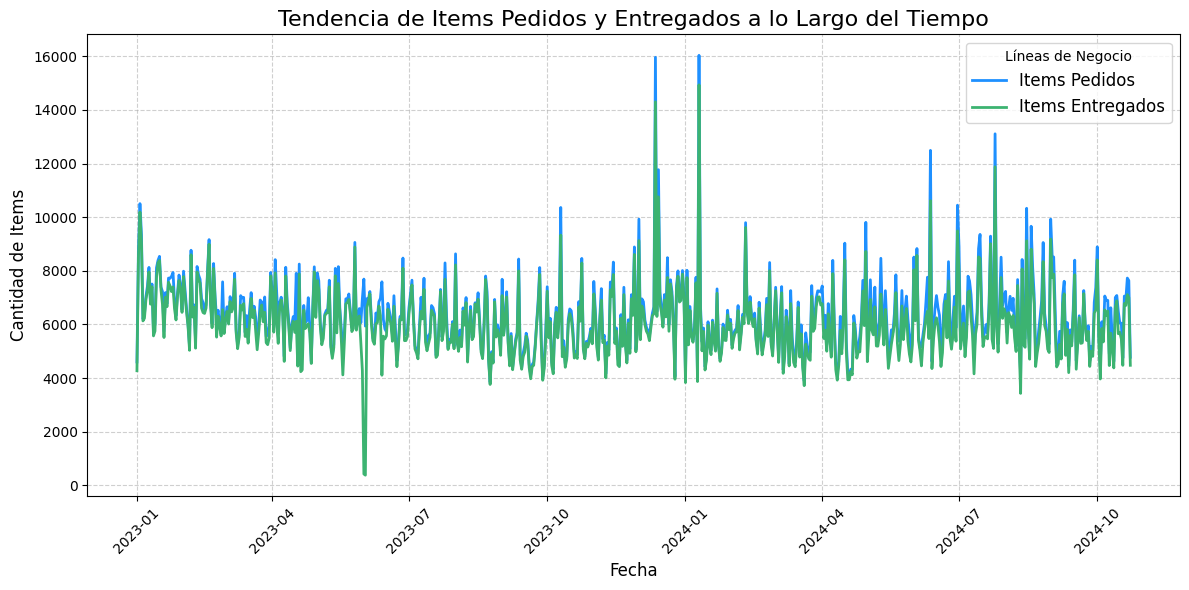

In [18]:
# Agrupar por fecha y sumar 'items_pedidos' y 'items_entregados'
df_grouped = df_bd_orders.groupby('order_date_formatted')[['items_pedidos', 'items_entregados']].sum().reset_index()

# Usar seaborn para crear el gráfico
plt.figure(figsize=(12, 6))

# Graficar Items Pedidos
sns.lineplot(data=df_grouped, x='order_date_formatted', y='items_pedidos', label='Items Pedidos', color='dodgerblue', linewidth=2)

# Graficar Items Entregados
sns.lineplot(data=df_grouped, x='order_date_formatted', y='items_entregados', label='Items Entregados', color='mediumseagreen', linewidth=2)

# Personalización del gráfico
plt.title('Tendencia de Items Pedidos y Entregados a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad de Items', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Líneas de Negocio', fontsize=12)

# Mostrar el gráfico
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


No se observa una tendencia

#### Valor promedio de orden (Average Order Value - AOV).

In [19]:
# Calcular el AOV (Valor Promedio de Orden)
total_value = df_bd_orders['total_value'].sum()  # Suma del valor total de todas las órdenes
total_orders = df_bd_orders['order_id'].nunique()  # Número único de órdenes

AOV = total_value / total_orders  # Dividir el valor total entre el número total de órdenes

# Mostrar el resultado
print(f"El Valor Promedio de Orden (AOV) es: {AOV:.2f}")

El Valor Promedio de Orden (AOV) es: 35.97


In [20]:
print(total_value)

11156021.14


In [21]:
print(total_orders)

310153


In [22]:
print(df_bd_orders.shape[0])

# por lo que veo la cantidad única de ordenes es la misma cantidad de filas. 

310153


#### Tasa de cumplimiento de entregas (ítems pedidos vs ítems entregados).

In [23]:
# Calcular la tasa de cumplimiento de entregas
df_bd_orders['cumplimiento'] = df_bd_orders['items_entregados'] / df_bd_orders['items_pedidos'] * 100

# Calcular la tasa promedio de cumplimiento de entregas
tasa_cumplimiento_promedio = df_bd_orders['cumplimiento'].mean()

# Mostrar el resultado
print(f"La tasa promedio de cumplimiento de entregas es: {tasa_cumplimiento_promedio:.2f}%")

La tasa promedio de cumplimiento de entregas es: 95.67%


#### Valor generado por canal (si aplica a los datos).

In [24]:
# Calcular el valor generado por cada canal
valor_por_canal = df_bd_orders.groupby('channel')['total_value'].sum().reset_index()

# Ordenar los resultados de mayor a menor
valor_por_canal = valor_por_canal.sort_values(by='total_value', ascending=False)

# Mostrar el resultado
print(valor_por_canal)

  channel  total_value
1  Market   9444173.15
0    Eats   1711847.99


Genero métricas: 
- Usar total_value para calcular ingresos totales por línea de negocio y por mes.

In [25]:
# Convertir la columna 'order_date_formatted' a formato datetime si no lo está
df_bd_orders['order_date_formatted'] = pd.to_datetime(df_bd_orders['order_date_formatted'])

# Crear una nueva columna para el mes y año de la orden
df_bd_orders['month_year'] = df_bd_orders['order_date_formatted'].dt.to_period('M')

# Calcular los ingresos totales por línea de negocio y mes
ingresos_por_linea_mes = df_bd_orders.groupby(['categoria', 'month_year'])['total_value'].sum().reset_index()

# Mostrar el resultado
print(ingresos_por_linea_mes)

    categoria month_year  total_value
0    Asiática    2023-01      4943.29
1    Asiática    2023-02      6960.33
2    Asiática    2023-03      5358.82
3    Asiática    2023-04      6261.86
4    Asiática    2023-05      5091.42
..        ...        ...          ...
388     Árabe    2024-06       145.16
389     Árabe    2024-07       336.19
390     Árabe    2024-08       343.14
391     Árabe    2024-09       442.44
392     Árabe    2024-10       337.98

[393 rows x 3 columns]


- Calcular la tasa de cumplimiento: (skus_entregados / skus_pedidos).

In [26]:
# Calcular la tasa de cumplimiento (skus_entregados / skus_pedidos)
df_bd_orders['tasa_cumplimiento'] = df_bd_orders['skus_entregados'] / df_bd_orders['skus_pedidos']

# Ver los primeros registros para verificar
print(df_bd_orders[['order_id', 'skus_pedidos', 'skus_entregados', 'tasa_cumplimiento']].head())

       order_id  skus_pedidos  skus_entregados  tasa_cumplimiento
0  912710261SE1             8              8.0                1.0
1  912709920SE1             9              9.0                1.0
2  912709908SE1            11             11.0                1.0
3  912709881SE1            12             12.0                1.0
4  912709621SE1            12             12.0                1.0


- Identificar estacionalidad o tendencias en las órdenes.

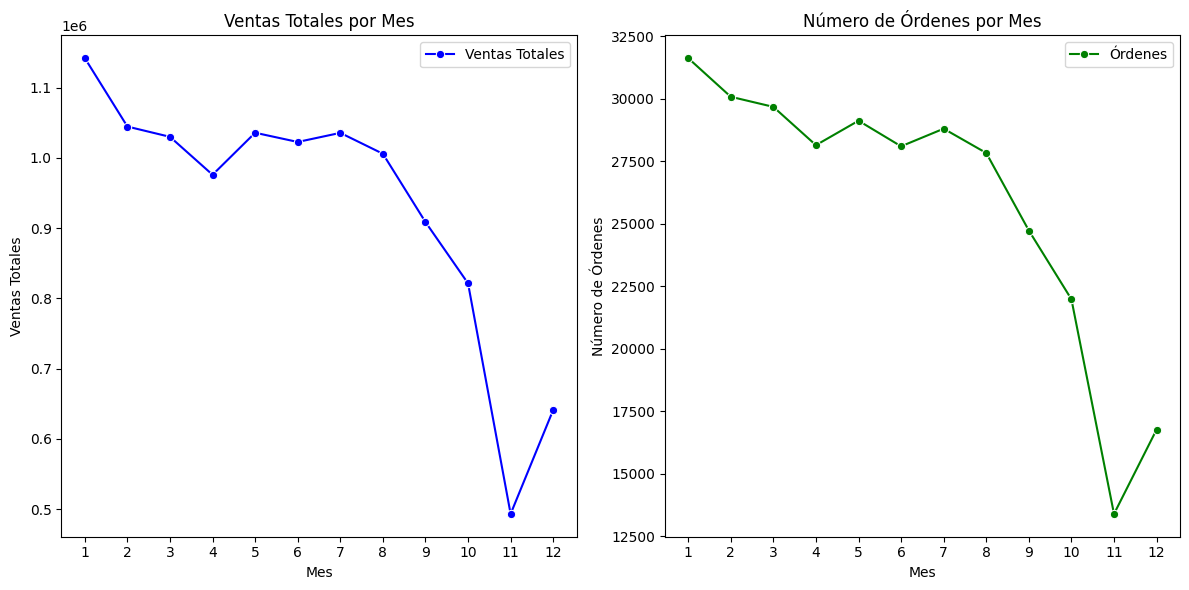

In [27]:
# Extraer componentes temporales (Mes, Día de la semana, etc.)
df_bd_orders['mes'] = df_bd_orders['order_date_formatted'].dt.month
df_bd_orders['dia_semana'] = df_bd_orders['order_date_formatted'].dt.dayofweek

# Agrupar por mes y calcular las ventas totales (o el número de órdenes)
ventas_mensuales = df_bd_orders.groupby('mes')['total_value'].sum()

# Agrupar por mes para ver el número total de órdenes
ordenes_mensuales = df_bd_orders.groupby('mes')['order_id'].count()

# Visualizar las tendencias de ventas y órdenes mensuales
plt.figure(figsize=(12, 6))

# Ventas mensuales
plt.subplot(1, 2, 1)
sns.lineplot(x=ventas_mensuales.index, y=ventas_mensuales.values, marker='o', color='b', label='Ventas Totales')
plt.title('Ventas Totales por Mes')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.xticks(range(1, 13))

# Órdenes mensuales
plt.subplot(1, 2, 2)
sns.lineplot(x=ordenes_mensuales.index, y=ordenes_mensuales.values, marker='o', color='g', label='Órdenes')
plt.title('Número de Órdenes por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Órdenes')
plt.xticks(range(1, 13))

plt.tight_layout()
plt.show()


Visualización:
- Crear gráficos para ingresos totales, órdenes por línea de negocio y estacionalidad.

TypeError: Invalid object type at position 0

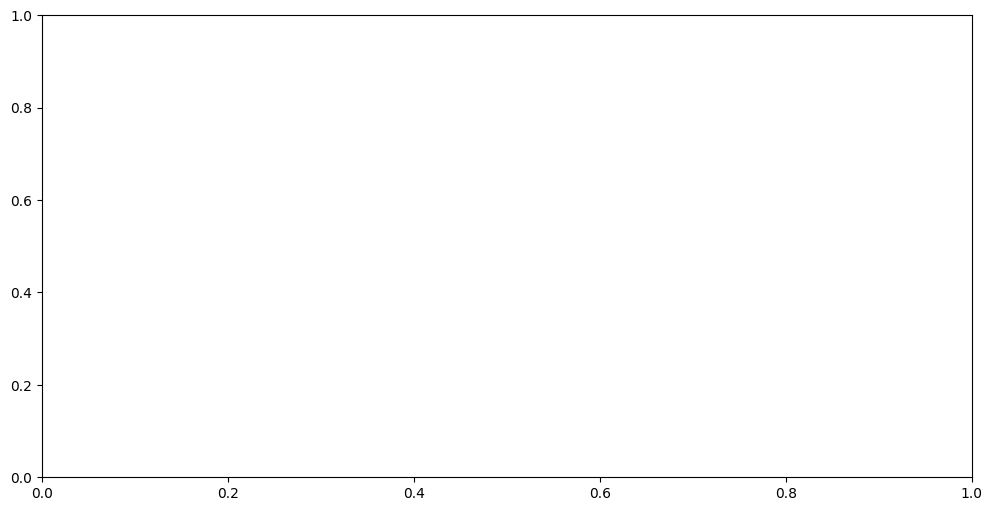

In [29]:
# Agrupar por mes y línea de negocio (Market/Eats) y calcular los ingresos totales
df_orders_income = df_bd_orders.groupby([df_bd_orders['order_date_formatted'].dt.to_period('M'), 'categoria'])['total_value'].sum().reset_index()

# Graficar los ingresos totales por línea de negocio
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_orders_income, x='order_date_formatted', y='total_value', hue='categoria', marker='o', lw=2)

plt.title("Ingresos Totales por Línea de Negocio (Market vs Eats)", fontsize=16)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Ingresos Totales ($)", fontsize=12)
plt.legend(title='Línea de Negocio')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [30]:
# # Contar las órdenes por mes (total de ítems pedidos)
# df_orders_seasonality = df_bd_orders.groupby(df_bd_orders['order_date_formatted'].dt.to_period('M'))['order_id'].count().reset_index()

# # Graficar estacionalidad (órdenes totales por mes)
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=df_orders_seasonality, x='order_date_formatted', y='order_id', marker='o', lw=2, color='purple')

# plt.title("Estacionalidad de Órdenes a lo Largo del Año", fontsize=16)
# plt.xlabel("Mes", fontsize=12)
# plt.ylabel("Cantidad de Órdenes", fontsize=12)

# # Mostrar el gráfico
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


### Análisis de la performance a nivel cliente

Tiempo desde el registro hasta la primera compra.

Número de órdenes por cliente.

Valor total generado por cliente.

Categorizar clientes según frecuencia y valor (RFM Analysis).

## Sección 2: Estrategia de marketing


### Carga de datos

En esta sección se importan los datasets proporcionados.

In [31]:
# Cargar datasets desde archivos Excel

# Base de datos sobre las campañas de envíos automatizados de comunicaciones que tuvo prendida 
# el cliente durante Q3 2024 con un detalle de los envíos realizados
df_BD_campaigns_Q3 = pd.read_excel('pages/bd_campaigns_q3.xlsx', engine='openpyxl')

Traceback (most recent call last):
  File "c:\Users\solange.moreyra\.vscode\extensions\ms-python.python-2024.22.0-win32-x64\python_files\python_server.py", line 133, in exec_user_input
    retval = callable_(user_input, user_globals)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 5, in <module>
  File "C:\Users\solange.moreyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\io\excel\_base.py", line 495, in read_excel
    io = ExcelFile(
         ^^^^^^^^^^
  File "C:\Users\solange.moreyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\io\excel\_base.py", line 1567, in __init__
    self._reader = self._engines[engine](
                   ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\solange.moreyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python

In [32]:
# Visualizar las primeras filas de orders
print(df_BD_campaigns_Q3.head())

   workspace_id               created_at  campaign_id           campaign_name  \
0        145987  2024-09-25 15:00:15 UTC            8  1. Onboarding Campaign   
1        145987  2024-09-25 15:00:19 UTC            8  1. Onboarding Campaign   
2        145987  2024-09-25 15:00:15 UTC            8  1. Onboarding Campaign   
3        145987  2024-09-25 15:00:11 UTC            8  1. Onboarding Campaign   
4        145987  2024-09-25 15:00:18 UTC            8  1. Onboarding Campaign   

   newsletter_id  content_id     metric  metric_reason  \
0            NaN         272  delivered            NaN   
1            NaN         272  delivered            NaN   
2            NaN         272  delivered            NaN   
3            NaN         272  delivered            NaN   
4            NaN         272  delivered            NaN   

                    customer_id                   subject  \
0  N/BUwz4cGzuY3Y/oYewW9v59fnI=  🛒 Haz tu primera compra!   
1  sXt9O+HXjTa9u2/rkg4Rr0aiP04=  🛒 Haz tu 

### Análisis exploratorio de datos (EDA)

- **Shape**: Dimensiones de los datasets.
- **Missing values**: Identificación de valores nulos.
- **Distribuciones**: Análisis de distribuciones clave.

In [33]:
# Dimensiones de los datasets
print(f"File bd campaigns q3 shape: {df_BD_campaigns_Q3.shape}")

File bd campaigns q3 shape: (329902, 12)


In [ ]:
df_BD_campaigns_Q3 = pd.read_csv('pages/bd_campaigns_q3 - bq-results-20241024-214424-1729806389970.csv')

In [34]:
# Me fijo el tipo de dato de cada uno, tengo que validar el tipo de dato tenga sentido. 
df_BD_campaigns_Q3.dtypes

workspace_id       int64
created_at        object
campaign_id        int64
campaign_name     object
newsletter_id    float64
content_id         int64
metric            object
metric_reason    float64
customer_id       object
subject           object
preheader         object
delivery_type     object
dtype: object


In [41]:
# Estadísticas descriptivas bd orders
print(df_BD_campaigns_Q3.describe())

       workspace_id    campaign_id  newsletter_id     content_id  \
count      329902.0  329902.000000            0.0  329902.000000   
mean       145987.0      41.823690            NaN     947.922310   
std             0.0      12.840464            NaN     325.644192   
min        145987.0       8.000000            NaN      21.000000   
25%        145987.0      30.000000            NaN     481.000000   
50%        145987.0      52.000000            NaN    1159.000000   
75%        145987.0      52.000000            NaN    1162.000000   
max        145987.0      52.000000            NaN    1173.000000   

       metric_reason  
count            0.0  
mean             NaN  
std              NaN  
min              NaN  
25%              NaN  
50%              NaN  
75%              NaN  
max              NaN  


In [35]:
# Valores nulos bd orders
print(df_BD_campaigns_Q3.isnull().sum())

workspace_id          0
created_at            0
campaign_id           0
campaign_name         0
newsletter_id    329902
content_id            0
metric                0
metric_reason    329902
customer_id           0
subject               0
preheader         38371
delivery_type         0
dtype: int64


Si tengo newsletter_id y metric_reason es lo mismo porque ambas columnas estan en cero. 

In [36]:
# Me fijo en las variables categóricas qué opciones hay y cuáles hay de cada una

# campaign_name
print(df_BD_campaigns_Q3['campaign_name'].value_counts())

campaign_name
11.0. Incentivo compra ultra flash mail general Octubre    185830
5. Max Recurrencia Eats                                    107961
5. Soft-Churn                                               10746
1. Onboarding Campaign                                       5511
11.1. Octubre - Incentivo compra flash                       5136
4. Cross-sale Market to Eats FALTA ÚLTIMO MAIL               3696
11.2. Octubre - Incentivo compra mediana                     2666
11.3. Octubre - Incentivo compra grande                      1623
11.4. Octubre -  Felicitación promocode                      1080
11.5. Agosto - Incentivo 6ta compra                           729
3. Cross-Sale Eats to Market                                  722
10.2. Día del padre - Segmento incentivo 2da compra           527
11.6. Agosto - Incentivo 7ma compra                           505
10.3. Día del padre - Segmento incentivo 3ra compra           416
Día del Padre                                                 

In [37]:
# Me fijo en las variables categóricas qué opciones hay y cuáles hay de cada una

# metric
print(df_BD_campaigns_Q3['metric'].value_counts())

metric
delivered    278245
opened        51129
clicked         528
Name: count, dtype: int64


In [38]:
# Me fijo en las variables categóricas qué opciones hay y cuáles hay de cada una

# subject
print(df_BD_campaigns_Q3['subject'].value_counts())

subject
Este mes, ponte Happy Mode On con los regalos que traemos para ti🎉    185830
$3 DCTO para que calmes ese antojo 🤤🍴                                  33058
Un regalo para tu próxima compra te está esperando 🛒                   26462
Te enviamos un regalo para tu próxima compra! 🛒                        23119
15% DCTO + ENVÍO GRATIS en restaurantes 🥳                              17726
                                                                       ...  
Hola  Diana, te extrañamos, haz tu compra hoy!👋🏻                           1
Hola  Damaris, vuelve hacer tu super!👋🏻                                    1
Hola  Victoria, hace tiempo que no te vemos👋🏻                              1
Hola  Mariuxi, hace tiempo que no te vemos👋🏻                               1
Hola  Pamela, Tenemos un regalo para ti🥳🏄🏻‍♀️                              1
Name: count, Length: 194, dtype: int64


In [39]:
# Me fijo en las variables categóricas qué opciones hay y cuáles hay de cada una

# preheader
print(df_BD_campaigns_Q3['preheader'].value_counts())

preheader
Recibe sorpresas todo AGOSTO 🎈                                                      185830
Pide ahora superfácil 💚                                                              36496
Pide tu plato favorito superfácil 💚                                                  17726
No te lo pierdas! 💚                                                                  12440
¡No te pierdas este descuento!                                                       10746
No te pierdas este cupón!                                                             5508
Recibe regalos personalizados todo el mes 🎊                                           5136
No te lo pierdas                                                                      3956
Calma ese antojo y pide ahora! 💚                                                      2961
Mantente atento, tu próxima compra podría incluir algo especial para el hogar 🧽🎁      2666
Tus regalos te esperan. Descúbrelos🎁                                            

In [40]:
# Me fijo en las variables categóricas qué opciones hay y cuáles hay de cada una

# delivery_type
print(df_BD_campaigns_Q3['delivery_type'].value_counts())

delivery_type
email    329902
Name: count, dtype: int64


El delivery type es uno solo así que es lo mismo tenerlo o no. 

In [45]:
# Cantida de valores únicos por columna 
df_BD_campaigns_Q3[['campaign_name', 'metric', 'subject', 'preheader', 'delivery_type']].nunique()

campaign_name     31
metric             3
subject          194
preheader         34
delivery_type      1
dtype: int64

In [49]:
# Verifico que por campaing_id haya un solo campaing_name

# Contar la cantidad de cada métrica por campaign_id y campaign_name
df_BD_campaigns_Q3.groupby('campaign_name')['campaign_id'].nunique() != 1

campaign_name
1. Onboarding Campaign                                     False
10.1. Día del padre - Segmento incentivo 1ra compra        False
10.2. Día del padre - Segmento incentivo 2da compra        False
10.3. Día del padre - Segmento incentivo 3ra compra        False
10.4. Día del padre - Segmento incentivo 4ta compra        False
10.5. Día del padre - Segmento incentivo 5ta compra        False
10.6. Día del padre - Segmento incentivo 6ta compra        False
10.7. Día del padre - Segmento incentivo 7ma compra        False
10.8. Día del padre - Segmento incentivo 8va compra        False
10.9. Día del padre - Segmento incentivo 9na compra        False
11.0. Incentivo compra ultra flash mail general Octubre    False
11.1. Octubre - Incentivo compra flash                     False
11.2. Octubre - Incentivo compra mediana                   False
11.3. Octubre - Incentivo compra grande                    False
11.4. Octubre -  Felicitación promocode                    False
11.5. Agost

In [51]:
grouped_data = df_BD_campaigns_Q3.groupby(['campaign_name', 'metric']).size().reset_index(name='count')

# Mostrar el resultado
grouped_data

,campaign_name,metric,count
0,1. Onboarding Campaign,clicked,25
1,1. Onboarding Campaign,delivered,4923
2,1. Onboarding Campaign,opened,563
3,10.1. Día del padre - Segmento incentivo 1ra c...,clicked,27
4,10.1. Día del padre - Segmento incentivo 1ra c...,delivered,2
...,...,...,...
74,Día del Padre,clicked,38
75,Día del Padre,opened,330
76,HARD CHURM PERDIDOS,clicked,1
77,HARD CHURM PERDIDOS,opened,163


In [ ]:
# TODO: agregar un disclaimer de las dos columnas que notienen datos y el de la columna que tiene un solo valor. 